<a href="https://colab.research.google.com/github/jsansao/idl/blob/main/Licao29_Treinamento_NanoYOLOv5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lição 16 - Treinamento do YOLOv5 para dataset próprio



Nessa lição, vamos mostrar como treinar o YOLOv5 para detectar objetos de um dataset próprio. 

Vamos usar o dataset das peças de Xadrez usado em lição anterior, fornecido pela Roboflow e hospedado no github. 

O dataset está no formato do YOLO, que difere dos formatos COCO e PASCAL VOC.  

# Passo 1: Instalação

In [ ]:
#clone YOLOv5 and 
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt # install dependencies
%pip install -q roboflow

import torch
import os
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

# Passo 2: Download do dataset

In [ ]:
!wget https://github.com/jsansao/MaskWearing_YoloV5/archive/refs/heads/main.zip -O Masks.zip
!unzip Masks.zip -d /content/
!mv /content/MaskWearing_YOLOv5-main/* /content/


## Passo 3: Treinamento do modelo no YOLOv5

Podemos definir alguns parâmetros:

- **img:** tamanho da imagem de entrada
- **batch:** tamanho do lote
- **epochs:** Épocas de treinamento. (Note: often, 3000+ are common here!)
- **data:** Caminho do dataset
- **weights:** Inicialização dos pesos. No exemplo, usamos o modelo COCO pretreinado.
- **cache:** Faz cache das imagens para aceleração do processamento


É possível usar diferentes modelos pré-treinados, com diferentes tamanhos e requisitos computacionais para inferência. 

Veja tabela:


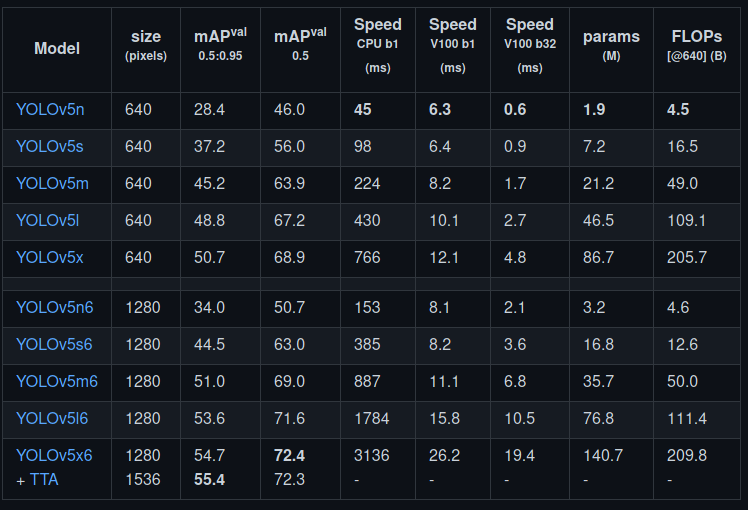

In [ ]:
!python train.py --img 416 --batch 16 --epochs 150 --data /content/data.yaml --weights yolov5n.pt --cache

# Avaliação de desempenho do YOLOv5 


In [ ]:
# Start tensorboard
# Launch after you have started training
# logs save in the folder "runs"
%load_ext tensorboard
%tensorboard --logdir runs

# Infererência com os pesos treinados: 

Roda a inferência no conteúdo do diretório `test/images/`


In [ ]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 416 --conf 0.1 --source /content/test/images

In [ ]:
#display inference on ALL test images

import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")